In [7]:
import numpy as np #导入NumPy数学工具箱
import pandas as pd #导入Pandas数据处理工具箱
df = pd.read_csv("../input/bank-customer/BankCustomer.csv") # 读取文件
df.head() # 显示文件前5行

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Male,37,Tianjin,3,2,1,1,634,31937.37,137062,0
1,Xue Baochai,Female,39,Beijing,9,1,1,1,556,18144.95,110194,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129910,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976,1


In [8]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

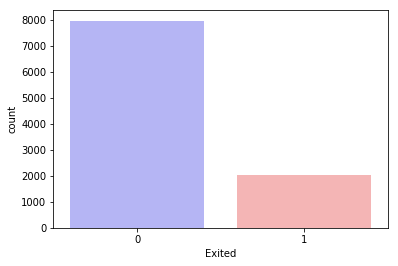

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns #导入seaborn画图工具箱
sns.countplot(x="Exited", data=df, palette="bwr")
plt.show()

In [10]:
# 将某些特征转换为数值类型的哑变量
a = pd.get_dummies(df['ProductsNo'], prefix = "PN")
b = pd.get_dummies(df['City'], prefix = "City")
c = pd.get_dummies(df['Gender'], prefix = "Gender")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()
df = df.drop(columns = ['ProductsNo', 'City',"Gender", "Name"])
df.head()

,Age,Tenure,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited,PN_1,PN_2,PN_3,PN_4,City_Beijing,City_Shanghai,City_Tianjin,Gender_Female,Gender_Male
0,37,3,1,1,634,31937.37,137062,0,0,1,0,0,0,0,1,0,1
1,39,9,1,1,556,18144.95,110194,0,1,0,0,0,1,0,0,1,0
2,32,9,1,1,803,10378.09,236311,1,1,0,0,0,1,0,0,1,0
3,37,0,1,1,778,25564.01,129910,1,0,1,0,0,0,0,1,1,0
4,55,4,1,0,547,3235.61,136976,1,0,0,1,0,0,0,1,0,1


In [11]:
# 构建特征和标签集
y = df.Exited.values
X = df.drop(['Exited'], axis = 1)

In [12]:
from sklearn.model_selection import train_test_split  # 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [13]:
# 进行特征缩放
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.metrics import (f1_score, confusion_matrix) # 导入评估指标

In [15]:
from sklearn.linear_model import LogisticRegression # 导入逻辑回归模型
from sklearn.metrics import f1_score, confusion_matrix # 导入评估标准
lr = LogisticRegression() # 逻辑回归
lr.fit(X_train,y_train) # 训练模型
y_pred = lr.predict(X_test) # 预测结果
lr_acc = lr.score(X_test,y_test)*100 # 准确率
lr_f1 = f1_score(y_test, y_pred)*100 # F1分数
print("逻辑回归测试集准确率： {:.2f}%".format(lr_acc))
print("逻辑回归测试集F1分数: {:.2f}%".format(lr_f1))
print('逻辑回归测试集混淆矩阵:\n', confusion_matrix(y_test,y_pred))

逻辑回归测试集准确率： 84.15%
逻辑回归测试集F1分数: 49.60%
逻辑回归测试集混淆矩阵:
 [[1527   56]
 [ 261  156]]


In [16]:
from sklearn.neighbors import KNeighborsClassifier # 导入KNN算法
k = 5 # 设定初始K值为5
knn = KNeighborsClassifier(n_neighbors = k)  # KNN模型
knn.fit(X_train, y_train) # 拟合KNN模型
y_pred = knn.predict(X_test) # 预测结果
knn_acc = knn.score(X_test,y_test)*100 # 准确率
knn_f1 = f1_score(y_test, y_pred)*100 # F1分数
print("{}NN 预测准确率: {:.2f}%".format(k, knn_acc))
print("{}NN 预测F1分数: {:.2f}%".format(k, knn_f1))
print('KNN 混淆矩阵:\n', confusion_matrix(y_test,y_pred))

5NN 预测准确率: 81.65%
5NN 预测F1分数: 43.80%
KNN 混淆矩阵:
 [[1490   93]
 [ 274  143]]


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


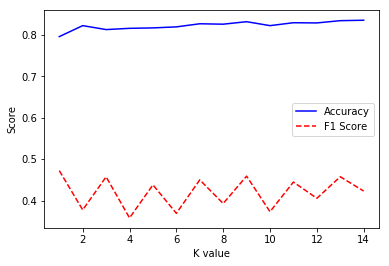

Maximum kNN Score is 47.23%


In [17]:
# 寻找最佳K值
f1_score_list = []
acc_score_list = []
for i in range(1,15): # 从1到15，尝试每一个K值
    kNN = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    kNN.fit(X_train, y_train)
    acc_score_list.append(kNN.score(X_test, y_test))
    y_pred = kNN.predict(X_test) # 预测结果
    f1_score_list.append(f1_score(y_test, y_pred))
index = np.arange(1,15,1)
# 绘制不同K值时，kNN的准确率和F1分数
plt.plot(index,acc_score_list,c='blue',linestyle='solid')
plt.plot(index,f1_score_list,c='red',linestyle='dashed')
plt.legend(["Accuracy", "F1 Score"])
plt.xlabel("K value")
plt.ylabel("Score")
plt.grid('false')
plt.show()
kNN_acc = max(f1_score_list)*100
print("Maximum kNN Score is {:.2f}%".format(kNN_acc))

In [18]:
from sklearn.svm import SVC # 导入SVM分类器
svm = SVC(random_state = 1) # SVM模型
svm.fit(X_train, y_train) #拟合SVM模型
y_pred = svm.predict(X_test) # 预测心脏病结果
svm_acc = svm.score(X_test,y_test)*100 # 准确率
svm_f1 = f1_score(y_test, y_pred)*100 # F1分数
print("SVM 预测准确率:: {:.2f}%".format(svm_acc))
print("SVM 预测F1分数: {:.2f}%".format(svm_f1))
print('SVM 混淆矩阵:\n', confusion_matrix(y_test,y_pred))

SVM 预测准确率:: 84.45%
SVM 预测F1分数: 46.66%
SVM 混淆矩阵:
 [[1553   30]
 [ 281  136]]


In [19]:
from sklearn.naive_bayes import GaussianNB # 导入模型
nb = GaussianNB() # 朴素贝叶斯模型
nb.fit(X_train, y_train) # 拟合模型
y_pred = nb.predict(X_test) # 预测心脏病结果
nb_acc = nb.score(X_test,y_test)*100 # 准确率
nb_f1 = f1_score(y_test, y_pred)*100 # F1分数
print("朴素贝叶斯测试集准确率:: {:.2f}%".format(nb_acc))
print("朴素贝叶斯测试集F1分数: {:.2f}%".format(nb_f1))
print('朴素贝叶斯混淆矩阵:\n', confusion_matrix(y_test,y_pred))

朴素贝叶斯测试集准确率:: 81.35%
朴素贝叶斯测试集F1分数: 22.13%
朴素贝叶斯混淆矩阵:
 [[1574    9]
 [ 364   53]]


In [20]:
from sklearn.tree import DecisionTreeClassifier # 导入模型
dt = DecisionTreeClassifier() # 分类决策树
dt.fit(X_train, y_train) # 拟合模型
y_pred = dt.predict(X_test) # 预测心脏病结果
dt_acc = dt.score(X_test,y_test)*100 # 准确率
dt_f1 = f1_score(y_test, y_pred)*100 # F1分数
print("决策树测试集准确率:: {:.2f}%".format(dt_acc))
print("决策树测试集F1分数: {:.2f}%".format(dt_f1))
print('决策树混淆矩阵:\n', confusion_matrix(y_test,y_pred))

决策树测试集准确率:: 79.95%
决策树测试集F1分数: 52.09%
决策树混淆矩阵:
 [[1381  202]
 [ 199  218]]


In [21]:
from sklearn.ensemble import RandomForestClassifier # 导入模型
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1) # 随机森林
rf.fit(X_train, y_train) # 拟合模型
y_pred = rf.predict(X_test) # 预测心脏病结果
rf_acc = rf.score(X_test,y_test)*100 # 准确率
rf_f1 = f1_score(y_test, y_pred)*100 # F1分数
print("随机森林 预测准确率:: {:.2f}%".format(rf_acc))
print("随机森林 预测F1分数: {:.2f}%".format(rf_f1))
print('随机森林 混淆矩阵:\n', confusion_matrix( y_test,y_pred))

随机森林 预测准确率:: 86.50%
随机森林 预测F1分数: 59.58%
随机森林 混淆矩阵:
 [[1531   52]
 [ 218  199]]


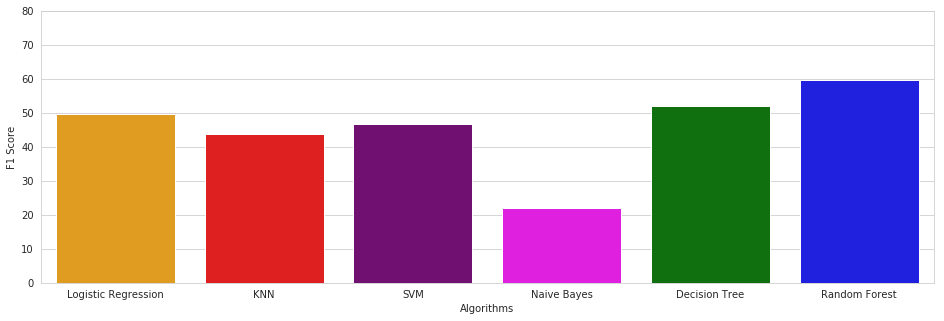

In [25]:
# 用直方图显示出各个算法的F1分数
import seaborn as sns
methods = ["Logistic Regression", "KNN", "SVM", 
           "Naive Bayes", "Decision Tree", "Random Forest"]
f1 = [lr_f1, knn_f1, svm_f1, nb_f1, dt_f1, rf_f1]
colors = ["orange","red","purple", "magenta", "green","blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylim((0,80))
plt.ylabel("F1 Score")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=f1, palette=colors)
# plt.grid(b=None)
plt.show()

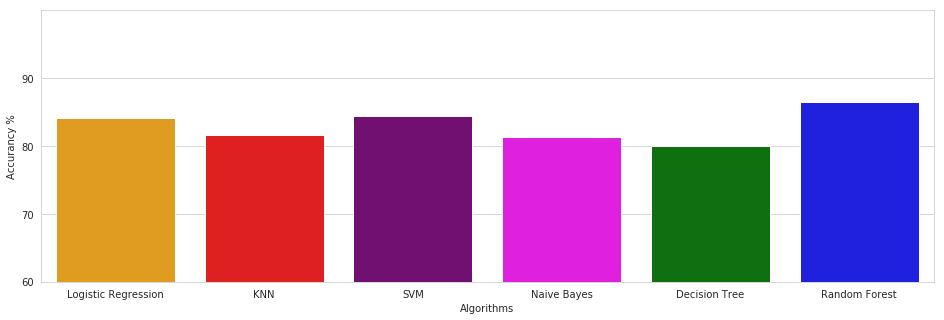

In [23]:
# 用直方图显示出各个算法的预测准确率
import seaborn as sns
methods = ["Logistic Regression", "KNN", "SVM", 
           "Naive Bayes", "Decision Tree", "Random Forest"]
f1 = [lr_acc, knn_acc, svm_acc, nb_acc, dt_acc, rf_acc]
colors = ["orange","red","purple", "magenta", "green","blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylim((60,100))
plt.ylabel("Accurancy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=f1, palette=colors)
# plt.grid(b=None)
plt.show()